In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
df_part7 = pd.read_csv('data/전처리/전처리part7_1.csv', encoding='CP949')

In [4]:
# df_part7.drop(columns='Unnamed: 0', inplace=True)
df_part7

,회사명,거래소코드,회계년도,상장일,상장폐지일_x,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
0,(주)CMG제약,58820,201112,200108,NaN,0,0,0,제조업,1,13.166482,80.280163,5.219839,56.396905,4.65,1263.950784,3.61,-8.50,-5.58,2.37,3.51,-8.28,0.80,108.35,-245.87,406.280703,-34.519834,-58.600377,418.623493,-17.45,66.046945,200.97,165.03,15.10,602.31,51.41,3.53,-46.08,-172.40,-15.65,-24.07,35.590076,12.72,35.86,1.285100e+02,19.56,89.819047,27.179630,71.503704,19.715837,204.066667,0.66,0.984333,2.01,1.25,1.55,6.42,2.45,0.86
1,(주)CMG제약,58820,201212,200108,NaN,0,0,0,제조업,1,109.147119,-341.571868,75.170505,-8.429134,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,55.317408,693.49,649.98,68.81,323.41,80.77,-7.75,-8.10,-11.83,-3.62,-12.71,7.330001,0.47,2.89,1.067000e+01,1.66,1749.845902,-0.657015,69.134328,18.562172,425.291045,0.39,0.655130,0.93,0.52,0.57,5.71,1.85,0.42
2,(주)CMG제약,58820,201312,200108,NaN,0,0,0,제조업,1,-2.093352,2348.675303,55.100407,25.510008,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,87.631971,694.71,610.74,394.63,282.72,14.11,0.70,-39.85,-194.73,-4.93,-13.51,14.120364,12.51,77.91,2.894000e+02,34.29,71.284323,51.118235,79.448529,17.604882,411.485294,0.36,0.506332,1.26,0.48,0.52,5.39,2.07,0.42
3,(주)CMG제약,58820,201412,200108,NaN,0,0,0,제조업,1,3.855597,-46.641074,0.010946,11.520576,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,84.387905,324.58,268.23,101.24,285.31,18.50,3.60,-17.73,-104.12,-2.77,-7.06,25.090228,12.16,37.80,1.320600e+02,31.04,76.809811,43.079512,114.841463,30.445768,354.432927,0.40,0.464339,2.85,0.68,0.80,4.77,1.86,0.56
4,(주)CMG제약,58820,201512,200108,NaN,0,0,0,제조업,1,-2.644307,-2409.614083,-4.480893,18.851969,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,82.795953,296.85,235.21,29.00,254.69,20.78,-32.22,16.12,24988.82,2.77,5.80,31.315211,7.63,24.21,9.092000e+01,15.96,134.474407,27.671795,114.243590,28.007199,362.769231,0.47,0.564493,2.88,0.99,1.22,5.22,2.10,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,흥아해운(주),3280,201312,197606,NaN,0,0,0,운수 및 창고업,0,7.026008,17.748954,24.611435,5.977506,-3.78,-41.383093,2.51,2.36,3.29,3.50,13.80,12.97,1.84,95.90,18.35,9088.600308,214.300424,317.421335,1664.376003,273.07,27.203257,71.73,65.91,12.19,64.64,267.60,1.15,6.48,10.54,4.71,3.50,-20.576399,14.13,36.63,5.737466e+06,10.48,37.002209,103.399418,318.938865,0.000000,795.036390,1.39,6.107006,1.87,5.18,5.70,56.65,27.46,2.02
12739,흥아해운(주),3280,201412,197606,NaN,0,0,0,운수 및 창고업,0,13.690307,1.063296,7.760601,7.171915,9.90,-3.906495,2.25,2.22,3.01,3.04,11.51,11.37,1.66,97.18,16.84,9740.426978,216.579071,5.153858,1817.138085,301.53,25.784426,65.25,59.64,8.09,66.36,287.83,1.12,2.84,5.73,2.10,1.66,-16.142234,13.89,27.88,1.218393e+07,10.93,48.001879,102.744066,423.879470,0.000000,831.529801,1.35,5.499239,1.84,4.98,5.44,59.77,26.03,2.03
12740,흥아해운(주),3280,201512,197606,NaN,0,0,0,운수 및 창고업,0,21.933460,-42.676587,3.389326,2.420227,7.68,14.408829,2.51,1.24,1.46,2.95,12.48,6.18,2.22,98.11,11.64,9976.167403,124.150515,400.330868,1910.263815,314.93,21.863026,51.92,47.54,7.76,60.44,357.39,1.02,2.78,6.61,2.17,2.03,-9.102981,13.11,21.49,3.459744e+09,12.28,50.647901,10

## 피처와 클래스

In [5]:
df_part7.drop(df_part7[df_part7['회사명'].isna()].index, inplace=True)
df_part7.reset_index(drop=True, inplace=True)

In [6]:
df_part7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                12743 non-null  object 
 1   거래소코드              12743 non-null  int64  
 2   회계년도               12743 non-null  int64  
 3   상장일                12743 non-null  int64  
 4   상장폐지일_x            455 non-null    float64
 5   부실기업1              12743 non-null  int64  
 6   부실기업2              12743 non-null  int64  
 7   부실기업               12743 non-null  int64  
 8   업종                 12743 non-null  object 
 9   경기민감도              12743 non-null  int64  
 10  총자본증가율             12743 non-null  float64
 11  순이익증가율             12743 non-null  float64
 12  자기자본증가율            12743 non-null  float64
 13  매출액증가율             12743 non-null  float64
 14  종업원수증가율            12743 non-null  float64
 15  정상영업손익증가율          12743 non-null  float64
 16  매출액정상영업이익률         127

In [ ]:
# df_pr[df_pr['회계년도'].isin([201112, 201212, 201312, 201412, 201512, 201612, 201712, 201812])]

In [ ]:
### 컬럼별 인덱스 번호 확인
for i, col in enumerate(df_part7):
    print(i, col)

0 회사명
1 거래소코드
2 회계년도
3 상장일
4 상장폐지일_x
5 부실기업1
6 부실기업2
7 부실기업
8 업종
9 경기민감도
10 총자본증가율
11 순이익증가율
12 자기자본증가율
13 매출액증가율
14 종업원수증가율
15 정상영업손익증가율
16 매출액정상영업이익률
17 매출액순이익률
18 총자본순이익률
19 총자본정상영업이익률
20 자기자본정상영업이익률
21 자기자본순이익률
22 금융비용부담률
23 수지비율
24 사내유보 대 자기자본비율
25 1주당매출액
26 1주당순이익
27 1주당 CASH FLOW
28 1주당순자산
29 유보율
30 자기자본구성비율
31 유동비율
32 당좌비율
33 현금비율
34 매출채권 대 매입채무비율
35 부채비율
36 이자보상배율
37 CASH FLOW 대 부채비율
38 CASH FLOW 대 차입금비율
39 CASH FLOW 대 총자본비율
40 CASH FLOW 대 매출액비율
41 재고자산대순운전자본비율
42 총자본투자효율
43 설비투자효율
44 기계투자효율
45 부가가치율
46 노동소득분배율
47 종업원1인당부가가치율_계산
48 노동장비율_계산
49 기계장비율_계산
50 자본집약도_계산
51 총자본회전률
52 자기자본회전률
53 타인자본회전률
54 유동자산회전률
55 당좌자산회전률
56 재고자산회전률
57 매출채권회전률
58 순운전자본회전률


### 독립변수 및 종속변수 컬럼 지정

In [8]:
data = df_part7.iloc[:, 10:]
target = df_part7.iloc[:, 7]

In [9]:
data

,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
0,13.166482,80.280163,5.219839,56.396905,4.65,1263.950784,3.61,-8.50,-5.58,2.37,3.51,-8.28,0.80,108.35,-245.87,406.280703,-34.519834,-58.600377,418.623493,-17.45,66.046945,200.97,165.03,15.10,602.31,51.41,3.53,-46.08,-172.40,-15.65,-24.07,35.590076,12.72,35.86,1.285100e+02,19.56,89.819047,27.179630,71.503704,19.715837,204.066667,0.66,0.984333,2.01,1.25,1.55,6.42,2.45,0.86
1,109.147119,-341.571868,75.170505,-8.429134,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,55.317408,693.49,649.98,68.81,323.41,80.77,-7.75,-8.10,-11.83,-3.62,-12.71,7.330001,0.47,2.89,1.067000e+01,1.66,1749.845902,-0.657015,69.134328,18.562172,425.291045,0.39,0.655130,0.93,0.52,0.57,5.71,1.85,0.42
2,-2.093352,2348.675303,55.100407,25.510008,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,87.631971,694.71,610.74,394.63,282.72,14.11,0.70,-39.85,-194.73,-4.93,-13.51,14.120364,12.51,77.91,2.894000e+02,34.29,71.284323,51.118235,79.448529,17.604882,411.485294,0.36,0.506332,1.26,0.48,0.52,5.39,2.07,0.42
3,3.855597,-46.641074,0.010946,11.520576,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,84.387905,324.58,268.23,101.24,285.31,18.50,3.60,-17.73,-104.12,-2.77,-7.06,25.090228,12.16,37.80,1.320600e+02,31.04,76.809811,43.079512,114.841463,30.445768,354.432927,0.40,0.464339,2.85,0.68,0.80,4.77,1.86,0.56
4,-2.644307,-2409.614083,-4.480893,18.851969,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,82.795953,296.85,235.21,29.00,254.69,20.78,-32.22,16.12,24988.82,2.77,5.80,31.315211,7.63,24.21,9.092000e+01,15.96,134.474407,27.671795,114.243590,28.007199,362.769231,0.47,0.564493,2.88,0.99,1.22,5.22,2.10,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,7.026008,17.748954,24.611435,5.977506,-3.78,-41.383093,2.51,2.36,3.29,3.50,13.80,12.97,1.84,95.90,18.35,9088.600308,214.300424,317.421335,1664.376003,273.07,27.203257,71.73,65.91,12.19,64.64,267.60,1.15,6.48,10.54,4.71,3.50,-20.576399,14.13,36.63,5.737466e+06,10.48,37.002209,103.399418,318.938865,0.000000,795.036390,1.39,6.107006,1.87,5.18,5.70,56.65,27.46,2.02
12739,13.690307,1.063296,7.760601,7.171915,9.90,-3.906495,2.25,2.22,3.01,3.04,11.51,11.37,1.66,97.18,16.84,9740.426978,216.579071,5.153858,1817.138085,301.53,25.784426,65.25,59.64,8.09,66.36,287.83,1.12,2.84,5.73,2.10,1.66,-16.142234,13.89,27.88,1.218393e+07,10.93,48.001879,102.744066,423.879470,0.000000,831.529801,1.35,5.499239,1.84,4.98,5.44,59.77,26.03,2.03
12740,21.933460,-42.676587,3.389326,2.420227,7.68,14.408829,2.51,1.24,1.46,2.95,12.48,6.18,2.22,98.11,11.64,9976.167403,124.150515,400.330868,1910.263815,314.93,21.863026,51.92,47.54,7.76,60.44,357.39,1.02,2.78,6.61,2.17,2.03,-9.102981,13.11,21.49,3.459744e+09,12.28,50.647901,108.702706,590.180812,0.000000,948.600246,1.17,5.113218,1.54,5.83,6.38,68.48,25.33,2.15
12741,21.081715,-263.287062,11.215038,-1.581947,15.87,-72.247242,0.71,-2.06,-1.96,0.67,3.23,-9.40,3.21,100.55,6.97,6512.596843,-134.467088,-10.880790,1439.386602,205.62,20.081457,39.46,32.52,5.46,68.73,397.97,0.21,2.12,6.30,1.70,1.96,-11.471676,10.98,15.81,3.509713e+09,12.66,66.490562,86.464501,709.037155,0.000000,1000.623142,0.95,4.964267,1.20,6.98,7.96,56.47,25.24,2.19


In [10]:
target

0        0
1        0
2        0
3        0
4        0
        ..
12738    0
12739    0
12740    0
12741    0
12742    1
Name: 부실기업, Length: 12743, dtype: int64

## 데이터 랜덤 분할

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
          총자본증가율      순이익증가율    자기자본증가율     매출액증가율  종업원수증가율   정상영업손익증가율  \
4015    1.516375    5.039206   6.811283   5.771085    -4.28    4.618819   
10105  -9.093296   91.501214  22.262753  34.320647   -14.29  813.211368   
7132   -4.750046   -2.841982   2.478580  -6.812388     1.93  -58.736378   
8291   13.299888  212.025805   8.368854  15.843847    -4.85   -2.401740   
5389    3.817423 -156.267582 -15.550104 -21.654575     9.29 -154.734179   
...          ...         ...        ...        ...      ...         ...   
8134   -0.103645   -2.686409   4.142518   6.111905    -5.08    1.232778   
4989  -18.246642 -758.128176 -16.262905 -38.672061   -14.75 -948.921082   
6962   50.752395  108.035493  -2.754842  18.868034    -6.70  102.598691   
2448   14.626300   -0.671766   0.708083  -0.843661    -1.37   -1.114030   
474    19.033482  -12.163401  14.530926   8.581736    10.81  -22.826185   

       매출액정상영업이익률  매출액순이익률  총자본순이익률  총자본정상영업이익률  자기자본정상영업이익률  자기자본순이익률  \
4015         

In [14]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(8920, 49), 테스트 세트 Shape:(3823, 49)
 학습 세트 레이블 값 분포 비율
0    0.941368
1    0.058632
Name: 부실기업, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.402354
1    0.026233
Name: 부실기업, dtype: float64


## 상관관계 히트맵

C:\Users\wndgj\AppData\Local\Temp\ipykernel_21832\2485885444.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


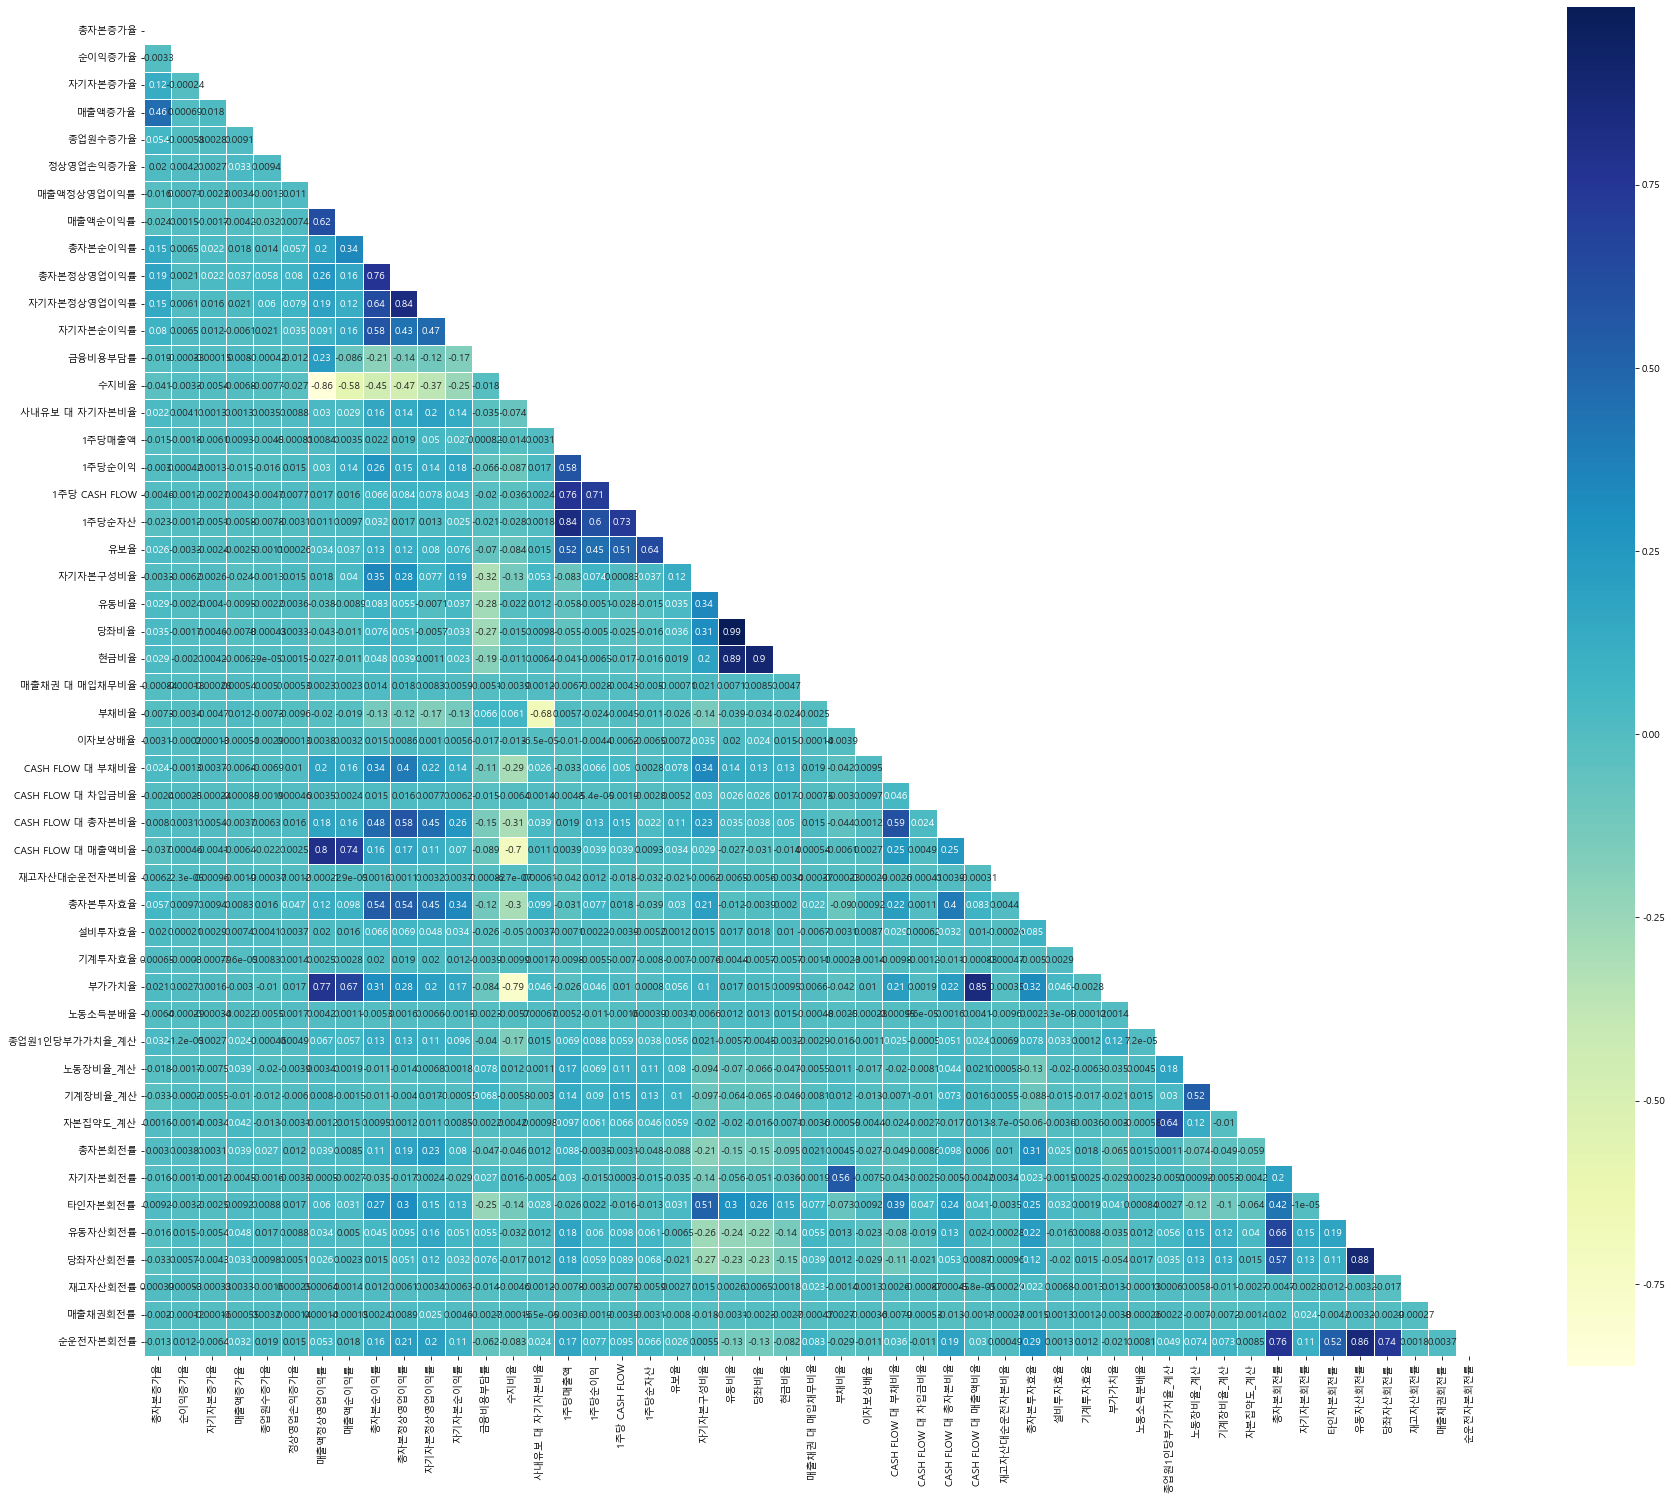

In [15]:
# 상관계수 히트맵

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(30,25))

df_corr = df_part7.iloc[:, 10:].corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, annot=True, mask=mask, linewidths=.5, cmap="YlGnBu", square=True)

plt.show()

In [17]:
df_corr

,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
총자본증가율,1.000000,-0.003346,0.124561,0.456933,0.054377,0.019997,-0.015799,-0.024033,0.149831,0.185393,0.148695,0.080395,-0.018502,-4.080230e-02,0.022232,-0.014708,-0.003048,-0.004593,-0.022866,0.026129,-0.003336,0.028804,0.035058,0.028711,-0.000845,-0.007290,0.003120,0.024153,-0.002386,0.007966,-0.037497,6.234205e-03,0.056551,0.020231,0.000651,0.021475,-0.006406,0.032046,-0.018446,-0.033239,0.001606,0.003048,-0.016232,0.009166,-0.015925,-0.033133,0.000385,-0.002003,-0.013292
순이익증가율,-0.003346,1.000000,-0.000244,0.000687,-0.000576,0.004245,0.000714,0.001498,0.006465,0.002135,0.006117,0.006477,-0.000335,-3.280839e-03,0.004119,-0.001803,0.000417,-0.001237,-0.001152,-0.003333,-0.006150,-0.002428,-0.001671,-0.001992,-0.000176,-0.003358,-0.000198,-0.001318,0.000246,0.003091,0.000462,-2.250867e-05,0.009736,0.000214,-0.000301,0.002737,-0.000288,-0.000012,-0.001664,-0.000199,-0.001450,0.003751,-0.001111,-0.003165,0.014566,0.005687,0.000530,-0.000119,0.012334
자기자본증가율,0.124561,-0.000244,1.000000,0.017877,0.002841,0.002700,-0.002305,-0.001687,0.021880,0.022161,0.016420,0.011595,-0.000145,-5.378819e-03,0.001315,-0.006132,0.001286,-0.002742,-0.005061,-0.002436,0.002588,0.004000,0.004594,0.004161,-0.000282,-0.004654,0.000132,0.003726,-0.000241,0.005426,-0.004149,9.646169e-04,0.009373,0.002873,-0.000795,0.001583,-0.000341,0.002744,-0.007503,-0.005530,-0.003377,0.003082,-0.001234,-0.002450,-0.005443,-0.004349,-0.000333,-0.000159,-0.006425
매출액증가율,0.456933,0.000687,0.017877,1.000000,0.009081,0.032808,0.003370,-0.004182,0.018219,0.036562,0.020868,-0.006145,0.007962,-6.849812e-03,0.001317,0.009306,-0.014841,0.004250,-0.005844,-0.002507,-0.024237,-0.009515,-0.007783,-0.006166,0.000540,0.012029,-0.000514,-0.006384,-0.000845,-0.003744,-0.006404,-1.911633e-03,0.008293,0.007434,-0.000076,-0.002982,-0.002187,0.024107,0.039485,-0.010393,0.041757,0.038647,-0.004462,0.009156,0.047644,0.032635,0.003317,-0.000546,0.032245
종업원수증가율,0.054377,-0.000576,0.002841,0.009081,1.000000,0.009440,-0.001274,-0.031969,0.013558,0.057677,0.060395,0.020655,-0.000417,-7.733419e-03,0.003533,-0.004481,-0.016329,-0.004699,-0.007810,-0.001126,-0.001257,-0.002239,-0.000426,-0.000090,0.004968,-0.007297,-0.002870,-0.006918,-0.001852,0.006299,-0.022001,-3.728801e-04,0.015921,0.004141,0.008320,-0.010063,-0.005462,-0.000464,-0.020146,-0.012261,-0.013355,0.027495,-0.001611,0.008837,0.017075,0.009826,-0.001638,0.003193,0.018768
정상영업손익증가율,0.019997,0.004245,0.002700,0.032808,0.009440,1.000000,0.011410,0.007409,0.057267,0.079518,0.079402,0.035032,-0.011771,-2.729914e-02,0.008819,-0.000814,0.014948,0.007732,-0.003065,0.000261,0.015469,0.003637,0.003282,0.001473,0.000532,-0.009577,0.000134,0.009995,0.000458,0.016070,0.002458,-1.228231e-03,0.046526,0.003710,0.001379,0.016513,0.001731,0.004851,-0.003870,-0.005958,-0.003116,0.011786,-0.003468,0.017231,0.008768,0.005134,0.000246,0.000145,0.015216
매출액정상영업이익률,-0.015799,0.000714,-0.002305,0.003370,-0.001274,0.011410,1.000000,0.619623,0.196992,0.257261,0.189293,0.091349,0.227010,-8.621680e-01,0.029543,0.008388,0.029863,0.017076,0.011335,0.033755,0.017983,-0.037634,-0.042587,-0.026861,0.002290,-0.020260,0.003843,0.195639,0.003501,0.178787,0.802021,-2.204569e-04,0.124924,0.020363,0.002450,0.769040,0.004156,0.067052,0.003353,0.008047,-0.001160,0.038835,-0.000497,0.059802,0.033980,0.026215,0.000636,0.000141,0.052795
매출액순이익률,-0.024033,0.001498,-0.001687,-0.004182,-0.031969,0.007409,0.619623,1.000000,0.336024,0.162489,0.122058,0.161855,-0.085622,-5.766697e-01,0.028619,0.003548,0.144014,0.015525,0.009679,0.037455,0.03986

## 통합데이터 피처셀렉션

### Lasso

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import time
import warnings
warnings.simplefilter('ignore')

### Lasso GridSearchCV

In [19]:
lasso_model = Lasso()

param_grid = {'alpha' : [0.001, 0.01, 0.1, 1, 2, 5, 10]}

grid_time = time.time()
grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)
print('GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-grid_time))

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

GridSearchCV 수행 시간: 8.3 초


,params,mean_train_score,mean_test_score,rank_test_score
2,{'alpha': 0.1},0.119655,0.075958,1
1,{'alpha': 0.01},0.132048,0.069828,2
0,{'alpha': 0.001},0.134160,0.067852,3
4,{'alpha': 2},0.035402,0.020162,4
5,{'alpha': 5},0.027373,0.015712,5
3,{'alpha': 1},0.054872,0.009900,6
6,{'alpha': 10},0.015450,0.007907,7


In [20]:
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'alpha': 0.1}
GridSearchCV 최고 정확도:0.0760


In [21]:
# grid_search.best_params_의 alpha 값
for value in grid_search.best_params_:
    bp_value = grid_search.best_params_[value]
    print(bp_value)

0.1


In [22]:
alpha = bp_value
lasso_time = time.time()
lasso_best = Lasso(alpha=alpha).fit(X_train, y_train)
print('Lasso 수행 시간: {0:.1f} 초'.format(time.time()-lasso_time))
print('alpha가 ', alpha, '일 때 피처 개수 : {}'.format(np.sum(lasso_best.coef_ != 0)))

Lasso 수행 시간: 0.4 초
alpha가  0.1 일 때 피처 개수 : 33


In [23]:
df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
# df_lasso.sort_values('coef', ascending=False).reset_index(drop=True)
df_lasso

,feature,coef
0,총자본증가율,-1.061265e-04
1,순이익증가율,2.365033e-07
2,자기자본증가율,1.667418e-05
3,매출액증가율,-2.895538e-06
4,종업원수증가율,-4.721331e-05
5,정상영업손익증가율,-5.583056e-06
6,매출액정상영업이익률,4.963307e-05
10,자기자본정상영업이익률,-2.885515e-03
11,자기자본순이익률,-5.299009e-04
13,수지비율,8.806176e-05


In [24]:
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')

Lasso에서 선택된 피처 수 33 개


In [25]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
lasso_features

['총자본증가율',
 '순이익증가율',
 '자기자본증가율',
 '매출액증가율',
 '종업원수증가율',
 '정상영업손익증가율',
 '매출액정상영업이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '수지비율',
 '사내유보 대 자기자본비율',
 '1주당매출액',
 '1주당순이익',
 '1주당 CASH FLOW',
 '1주당순자산',
 '유보율',
 '자기자본구성비율',
 '유동비율',
 '당좌비율',
 '매출채권 대 매입채무비율',
 '부채비율',
 '이자보상배율',
 'CASH FLOW 대 부채비율',
 'CASH FLOW 대 차입금비율',
 '재고자산대순운전자본비율',
 '총자본투자효율',
 '설비투자효율',
 '기계투자효율',
 '노동장비율_계산',
 '기계장비율_계산',
 '자본집약도_계산',
 '재고자산회전률',
 '매출채권회전률']

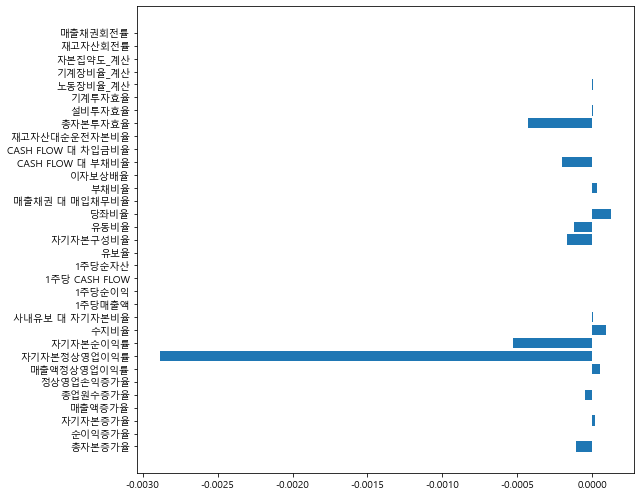

In [26]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(np.arange(len(df_lasso)), df_lasso['coef'])
idx = np.arange(len(df_lasso))
ax.set_yticks(idx)
ax.set_yticklabels(df_lasso['feature'])
fig.tight_layout()
plt.show()

## RFE(Recursive Feature Elimination, Wrapper method) 
#### 모든 변수들로부터 원하는 개수의 변수들이 남을 때까지 학습을 반복하며 유의미하지 않은 변수를 하나하나 제거해나가는 Backward 방식. AIC 값. 전진선택법, 스텝와이즈

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_time = time.time()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
rfe.fit(X_train, y_train)
print('RFE 수행시간: {0:.1f}초'.format(time.time()-rfe_time))

rfe_scores = pd.DataFrame()
rfe_scores['Feature'] = X_train.columns
rfe_scores['Support'] = rfe.get_support()

rfe_scores

RFE 수행시간: 8.8초


,Feature,Support
0,총자본증가율,True
1,순이익증가율,False
2,자기자본증가율,False
3,매출액증가율,False
4,종업원수증가율,False
5,정상영업손익증가율,False
6,매출액정상영업이익률,False
7,매출액순이익률,False
8,총자본순이익률,False
9,총자본정상영업이익률,True


In [28]:
rfe_support = rfe.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
rfe_feature

['총자본증가율',
 '총자본정상영업이익률',
 '자기자본정상영업이익률',
 '수지비율',
 'CASH FLOW 대 총자본비율',
 '총자본회전률',
 '타인자본회전률',
 '유동자산회전률',
 '당좌자산회전률',
 '순운전자본회전률']

([<matplotlib.axis.YTick at 0x2363e105780>], [Text(0, 0, '')])

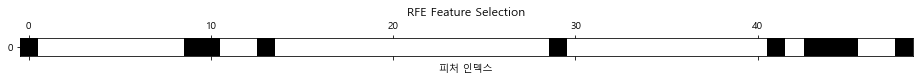

In [29]:
plt.matshow(rfe_support.reshape(1, -1), cmap = 'gray_r')
plt.title('RFE Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

## Stepwise

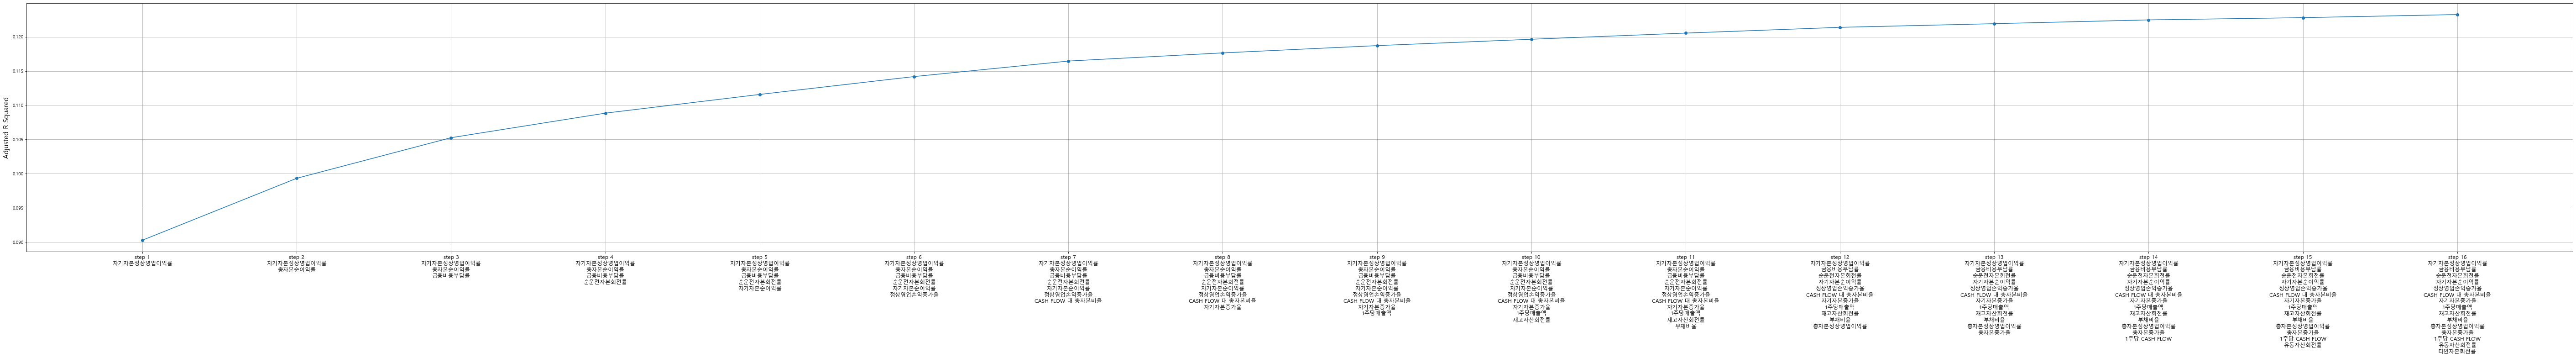

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist()):
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    
selected_variables = stepwise_feature_selection(X_train, y_train)

## SelectKBest(Filter method)
#### 각 피처와 타겟 사이에 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식. 피처 선택 후 따로 모델 적용이 필요가 없다. 카이제곱, information gain

In [31]:
from sklearn.feature_selection import f_regression, SelectKBest

skb = SelectKBest(score_func=f_regression, k=10)

X_train_selected = skb.fit_transform(X_train, y_train)
X_test_selected = skb.fit_transform(X_test, y_test)

X_train_selected.shape, X_test_selected.shape


((8920, 10), (3823, 10))

### 선택된 피처 확인 

In [32]:
feature_names = X_train.columns

# 선택된 feature mask처리
selected_mask = skb.get_support()

selected_features = feature_names[selected_mask]
unselected_features = feature_names[~selected_mask]

print('Selected features: ', selected_features)
print('Unselected features: ', unselected_features)


Selected features:  Index(['총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율',
       'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '총자본투자효율', '부가가치율'],
      dtype='object')
Unselected features:  Index(['총자본증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '정상영업손익증가율',
       '매출액정상영업이익률', '매출액순이익률', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율',
       '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 매출액비율', '재고자산대순운전자본비율', '설비투자효율', '기계투자효율', '노동소득분배율',
       '종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '총자본회전률',
       '자기자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '재고자산회전률', '매출채권회전률',
       '순운전자본회전률'],
      dtype='object')


## chi2, MinMaxScaler()
### 카이제곱 검정은 데이터에 음수가 있으면 안됨

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

chi_time = time.time()

mm_X_train = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(mm_X_train, y_train)
print('SelectKBest chi 수행시간: {0:.1f}초'.format(time.time()-chi_time))

chi_scores = pd.DataFrame()
chi_scores['Feature'] = X_train.columns
chi_scores['Support'] = chi_selector.get_support()

chi_scores

SelectKBest chi 수행시간: 0.1초


,Feature,Support
0,총자본증가율,False
1,순이익증가율,False
2,자기자본증가율,False
3,매출액증가율,False
4,종업원수증가율,False
5,정상영업손익증가율,False
6,매출액정상영업이익률,False
7,매출액순이익률,False
8,총자본순이익률,False
9,총자본정상영업이익률,True


In [34]:
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:, chi_support].columns.tolist()
chi_feature

['총자본정상영업이익률',
 '자기자본정상영업이익률',
 '1주당매출액',
 '유보율',
 '부채비율',
 '총자본회전률',
 '타인자본회전률',
 '유동자산회전률',
 '재고자산회전률',
 '순운전자본회전률']

([<matplotlib.axis.YTick at 0x2363e1a86d0>], [Text(0, 0, '')])

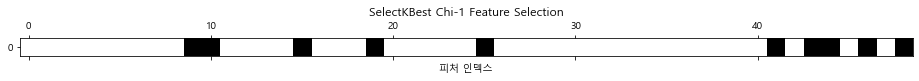

In [35]:
plt.matshow(chi_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectKBest Chi-1 Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

### SelectFromModel(Embedded method)
#### supervised 머신러닝 모델을 사용해서 피처 중요도를 평가 후 중요도가 높은 피처들만 선택하는 방식. 한번에 모든 피처들을 고려하기 때문에 상호작용 부분을 반영할 수 있다. LogisticRegression, DecisionTree, RandomForestClassifier, LGBMClassifier와 같은 모델에 적용이 필요하다.

### LogisticRegression

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm_lr_time = time.time()
sfm_lr = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'), max_features=10).fit(X_train, y_train)
sfm_lr.fit(X_train, y_train)
print('SelectFromModel LogisticRegression 수행시간: {0:.1f}초'.format(time.time()-sfm_lr_time))

sfm_lr_scores = pd.DataFrame()
sfm_lr_scores['Feature'] = X_train.columns
sfm_lr_scores['Support'] = sfm_lr.get_support()

sfm_lr_scores

SelectFromModel LogisticRegression 수행시간: 3.7초


,Feature,Support
0,총자본증가율,False
1,순이익증가율,False
2,자기자본증가율,False
3,매출액증가율,False
4,종업원수증가율,False
5,정상영업손익증가율,False
6,매출액정상영업이익률,True
7,매출액순이익률,False
8,총자본순이익률,False
9,총자본정상영업이익률,True


In [37]:
sfm_lr_support = sfm_lr.get_support()
sfm_lr_feature = X_train.loc[:,sfm_lr_support].columns.tolist()
sfm_lr_feature

['매출액정상영업이익률',
 '총자본정상영업이익률',
 '금융비용부담률',
 'CASH FLOW 대 총자본비율',
 '총자본투자효율',
 '총자본회전률',
 '타인자본회전률',
 '유동자산회전률',
 '당좌자산회전률',
 '순운전자본회전률']

([<matplotlib.axis.YTick at 0x236428bd000>], [Text(0, 0, '')])

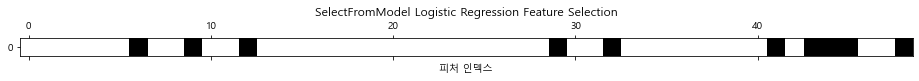

In [38]:
plt.matshow(sfm_lr_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectFromModel Logistic Regression Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

### RandomForestClassifier

In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sfm_rf_time = time.time()
sfm_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, max_features=10))
sfm_rf.fit(X_train, y_train)
print('SelectFromModel RandomForest 수행시간: {0:.1f}초'.format(time.time()-sfm_rf_time))

sfm_rf_scores = pd.DataFrame()
sfm_rf_scores['Feature'] = X_train.columns
sfm_rf_scores['Support'] = sfm_rf.get_support()

sfm_rf_scores

SelectFromModel RandomForest 수행시간: 11.4초


,Feature,Support
0,총자본증가율,True
1,순이익증가율,True
2,자기자본증가율,False
3,매출액증가율,True
4,종업원수증가율,True
5,정상영업손익증가율,True
6,매출액정상영업이익률,True
7,매출액순이익률,True
8,총자본순이익률,True
9,총자본정상영업이익률,True


In [40]:
sfm_rf_support = sfm_rf.get_support()
sfm_rf_feature = X_train.loc[:, sfm_rf_support].columns.tolist()
sfm_rf_feature

['총자본증가율',
 '순이익증가율',
 '매출액증가율',
 '종업원수증가율',
 '정상영업손익증가율',
 '매출액정상영업이익률',
 '매출액순이익률',
 '총자본순이익률',
 '총자본정상영업이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '금융비용부담률',
 '수지비율',
 '이자보상배율',
 '종업원1인당부가가치율_계산']

([<matplotlib.axis.YTick at 0x23644dea560>], [Text(0, 0, '')])

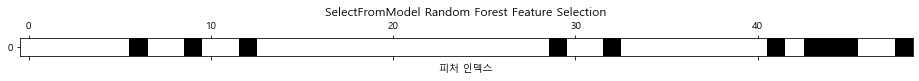

In [41]:
plt.matshow(sfm_lr_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectFromModel Random Forest Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

In [42]:
features_df = pd.DataFrame()
features_df['Feature'] = X_train.columns
features_df['Lasso'] = ''
features_df['RFE'] = rfe_scores['Support']
features_df['Chi-2'] = chi_scores['Support']
features_df['LR'] = sfm_lr_scores['Support']
features_df['RF'] = sfm_rf_scores['Support']

count = features_df[['Lasso', 'RFE', 'Chi-2', 'LR', 'RF']].sum(axis=1)
features_df['Total'] = count
features_df

,Feature,Lasso,RFE,Chi-2,LR,RF,Total
0,총자본증가율,,True,False,False,True,2
1,순이익증가율,,False,False,False,True,1
2,자기자본증가율,,False,False,False,False,0
3,매출액증가율,,False,False,False,True,1
4,종업원수증가율,,False,False,False,True,1
5,정상영업손익증가율,,False,False,False,True,1
6,매출액정상영업이익률,,False,False,True,True,2
7,매출액순이익률,,False,False,False,True,1
8,총자본순이익률,,False,False,False,True,1
9,총자본정상영업이익률,,True,True,True,True,4


In [43]:
df_lasso_bool = pd.DataFrame()
df_lasso_bool['Feature'] = features_df['Feature']
df_lasso_bool['Lasso'] = ''
for i in df_lasso_bool.index:
    if df_lasso_bool.loc[i, 'Feature'] in lasso_features:
        df_lasso_bool.loc[i, 'Lasso'] = True
    else:
        df_lasso_bool.loc[i, 'Lasso'] = False
df_lasso_bool


,Feature,Lasso
0,총자본증가율,True
1,순이익증가율,True
2,자기자본증가율,True
3,매출액증가율,True
4,종업원수증가율,True
5,정상영업손익증가율,True
6,매출액정상영업이익률,True
7,매출액순이익률,False
8,총자본순이익률,False
9,총자본정상영업이익률,False


### 모든 피처셀렉션 결과 병합 데이터프레임

In [44]:
features_df['Lasso'] = df_lasso_bool['Lasso']
count = features_df[['Lasso', 'RFE', 'Chi-2', 'LR', 'RF']].sum(axis=1)
features_df['Total'] = count
features_df['Total'] = features_df['Total']
features_df['Total'] = features_df['Total'].astype(int)
features_df.sort_values('Total', ascending=False).reset_index(drop=True)

,Feature,Lasso,RFE,Chi-2,LR,RF,Total
0,총자본정상영업이익률,False,True,True,True,True,4
1,자기자본정상영업이익률,True,True,True,False,True,4
2,총자본증가율,True,True,False,False,True,3
3,유동자산회전률,False,True,True,True,False,3
4,타인자본회전률,False,True,True,True,False,3
5,총자본회전률,False,True,True,True,False,3
6,수지비율,True,True,False,False,True,3
7,순운전자본회전률,False,True,True,True,False,3
8,매출액정상영업이익률,True,False,False,True,True,3
9,매출액증가율,True,False,False,False,True,2


In [45]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Feature  49 non-null     object
 1   Lasso    49 non-null     object
 2   RFE      49 non-null     bool  
 3   Chi-2    49 non-null     bool  
 4   LR       49 non-null     bool  
 5   RF       49 non-null     bool  
 6   Total    49 non-null     int32 
dtypes: bool(4), int32(1), object(2)
memory usage: 1.3+ KB
